INTRODUCTION

This project analyzes the Google Play Store dataset to explore patterns in app categories, ratings, installs, and pricing.The  file contains a single dataset with 998 rows and 15 columns.Each row represents one mobile application from the Google Play Store, while the columns capture different attributes of these apps such as the app name, category, user rating, number of reviews, number of installs, price, and content rating.

BUSINESS QUESTION

In [110]:
#impoting libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [128]:
df = pd.read_csv('Googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Paid,$14,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [112]:
print(df.shape)

(998, 13)


In [114]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             998 non-null    object 
 1   Category        998 non-null    object 
 2   Rating          974 non-null    float64
 3   Reviews         998 non-null    int64  
 4   Size            998 non-null    object 
 5   Installs        998 non-null    object 
 6   Type            998 non-null    object 
 7   Price           998 non-null    object 
 8   Content Rating  998 non-null    object 
 9   Genres          998 non-null    object 
 10  Last Updated    998 non-null    object 
 11  Current Ver     998 non-null    object 
 12  Android Ver     998 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 101.5+ KB
None


In [101]:
#calculating median values
median_values = df.median(numeric_only=True)
print(median_values)

Rating         4.3
Reviews    36950.5
dtype: float64


In [115]:
print(df.isna().sum())

App                0
Category           0
Rating            24
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
dtype: int64


2.Data processing

In [129]:
cat_cols = SP.select_dtypes(include=['object']).columns

for col in cat_cols:
  SP[col] = pd.factorize(SP[col])[0]
    
print(SP.head(6))

   App  Category  Rating  Reviews  Size  Installs  Type  Price  \
0    0         0     4.1      159     0         0     0     14   
1    1         0     3.9      967     1         1     1      0   
2    2         0     4.7    87510     2         2     1      0   
3    3         0     4.5   215644     3         3     1      0   
4    4         0     4.3      967     4         4     1      0   
5    5         0     4.4      167     5         5     1      0   

   Content Rating  Genres  Last Updated  Current Ver  Android Ver  
0               0       0             0            0            0  
1               0       1             1            1            0  
2               0       0             2            2            0  
3               1       0             3            3            1  
4               0       2             4            4            2  
5               0       0             5            5            3  


In [130]:
cat_cols = SP.select_dtypes(include=['object']).columns

for col in cat_cols:
  SP[col] = pd.Categorical(SP[col]).codes
    
print(SP.head(6))


   App  Category  Rating  Reviews  Size  Installs  Type  Price  \
0    0         0     4.1      159     0         0     0     14   
1    1         0     3.9      967     1         1     1      0   
2    2         0     4.7    87510     2         2     1      0   
3    3         0     4.5   215644     3         3     1      0   
4    4         0     4.3      967     4         4     1      0   
5    5         0     4.4      167     5         5     1      0   

   Content Rating  Genres  Last Updated  Current Ver  Android Ver  
0               0       0             0            0            0  
1               0       1             1            1            0  
2               0       0             2            2            0  
3               1       0             3            3            1  
4               0       2             4            4            2  
5               0       0             5            5            3  


3.Exploratory Data Analysis

Top 10 categories by total installs

In [117]:
top10_cat_installs = cat_installs.head(10)
print("Top 10 categories by total installs:")
print(top10_cat_installs)

Top 10 categories by total installs:
Category
COMMUNICATION          18472710000
SOCIAL                  4446200000
PHOTOGRAPHY             3893850000
TOOLS                   3493100000
TRAVEL_AND_LOCAL        2435300000
ENTERTAINMENT           2418560000
BOOKS_AND_REFERENCE     1292250000
SHOPPING                 875050000
BUSINESS                 489310000
EDUCATION                256652000
Name: Installs_clean, dtype: int64


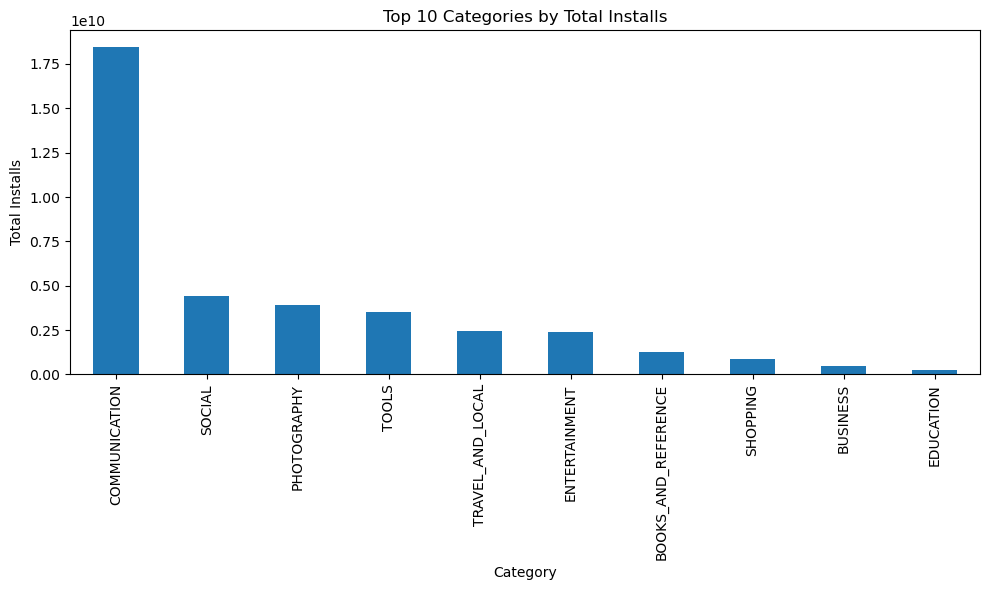

In [118]:
plt.figure(figsize=(10,6))
top10_cat_installs.plot(kind='bar')
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.tight_layout()
plt.show()

Distribution of app rating from 1 to 5

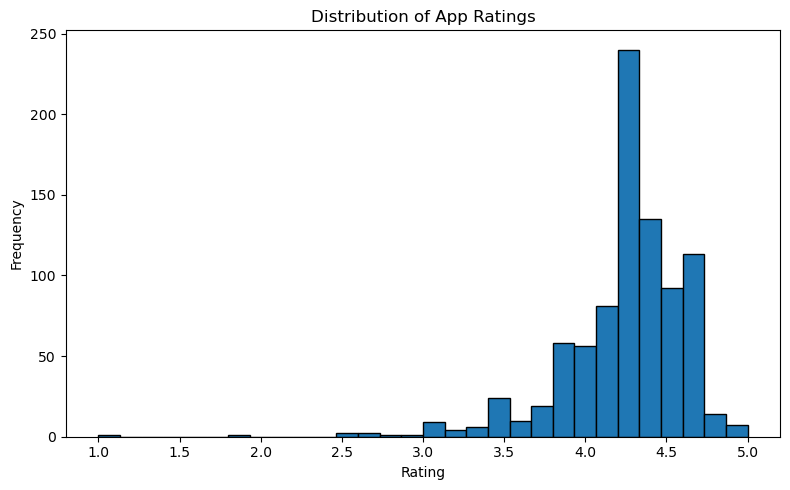

In [119]:
    plt.figure(figsize=(8,5))
    df_clean['Rating'].dropna().plot(kind='hist', bins=30, edgecolor='black')
    plt.title('Distribution of App Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Distribution of free and paid apps

Average rating of apps

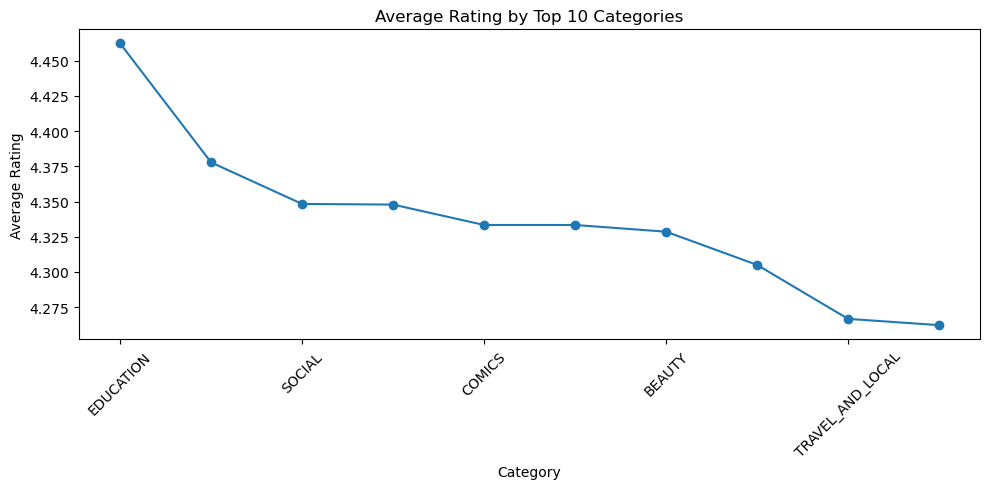

In [144]:
avg_rating_by_cat = df_clean.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
avg_rating_by_cat.plot(kind='line', marker='o')
plt.title('Average Rating by Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [135]:
total_free = (df['Type'] == 'Free').sum()
total_paid = (df['Type'] == 'Paid').sum()

print("Total Free Apps:", total_free)
print("Total Paid Apps:", total_paid)


Total Free Apps: 924
Total Paid Apps: 74


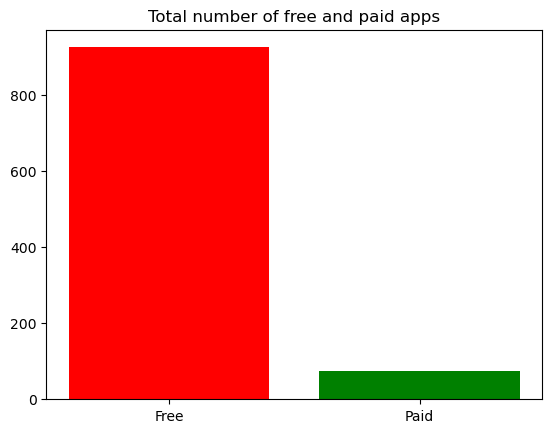

In [145]:
x= np.array(["Free", "Paid"])
y= np.array([924,74 ])
plt.bar(x,y, color=["r", "g"])
plt.title('Total number of free and paid apps')
plt.show()

Total number of apps in each category

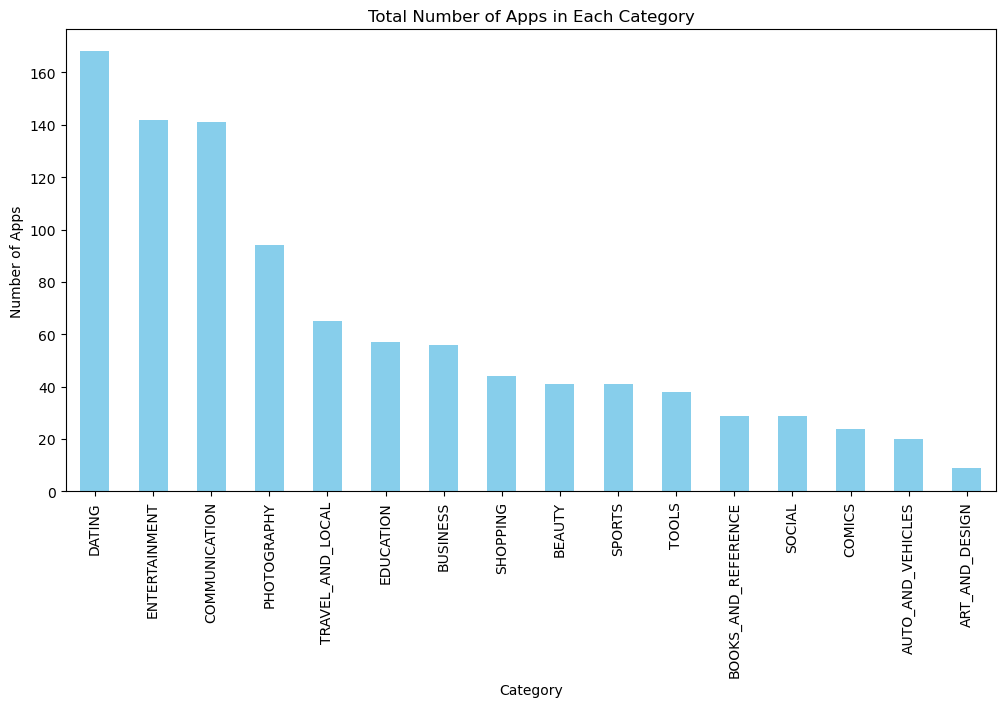

In [139]:

apps_per_category.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Total Number of Apps in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()


In [ ]:
Scatter plot

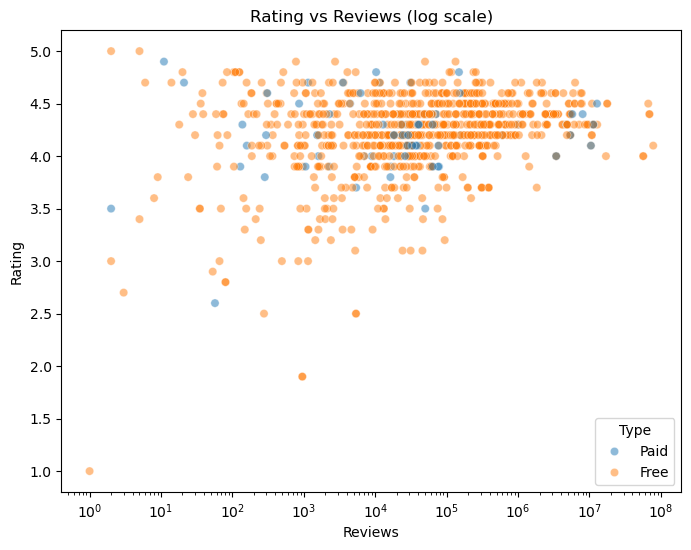

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Reviews', y='Rating', hue='Type', data=df, alpha=0.5)
plt.xscale('log')
plt.title('Rating vs Reviews (log scale)')
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.4, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Key Findings

•	Majority of apps are Free, while Paid apps form a small fraction.
•	Most apps are rated between 3.5 and 5.0, suggesting overall positive user perception.
•	Games, Communication, and Social dominate in terms of installs, while Education and Books stand out for high ratings.
•	Free apps attract more downloads and reviews, but Paid apps are not necessarily higher rated.


Recommendation

1.Developers should focus on categories such as Education and Health, as they show higher user satisfaction and ratings.

2.App pricing should generally remain under $10 to attract more downloads.

3.Encouraging users to leave positive reviews will improve visibility and trust in the app.

References

1.	Google Play Store Dataset (Kaggle): https://www.kaggle.com/lava18/google-play-store-apps
2.	Seaborn & Matplotlib Documentation: https://seaborn.pydata.org/ | https://matplotlib.org/
3.	Pandas Documentation: https://pandas.pydata.org/



appendix
1. Git hub :https://github.com/surakshit10/surakshit_project